In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('gnm.csv')

In [3]:
df.head

<bound method NDFrame.head of      GC_content_percentage  Genome_size  Virulence  AMR_gene  Label
0                    50.48      5594605        360       287      1
1                    50.57      5692546        352       286      1
2                    50.46      5661009        348       280      1
3                    50.50      5606180        329       281      1
4                    50.54      5649520        341       294      1
..                     ...          ...        ...       ...    ...
212                  50.79      4641665        199       242      0
213                  50.78      4659625        197       244      0
214                  50.75      4657541        195       244      0
215                  50.76      4643559        198       245      0
216                  50.79      4639694        199       243      0

[217 rows x 5 columns]>

In [4]:
df['Label'].unique()

array([1, 0])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GC_content_percentage  217 non-null    float64
 1   Genome_size            217 non-null    int64  
 2   Virulence              217 non-null    int64  
 3   AMR_gene               217 non-null    int64  
 4   Label                  217 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 8.6 KB


Text(0.5, 1.0, 'LABEL DISTRIBUTION')

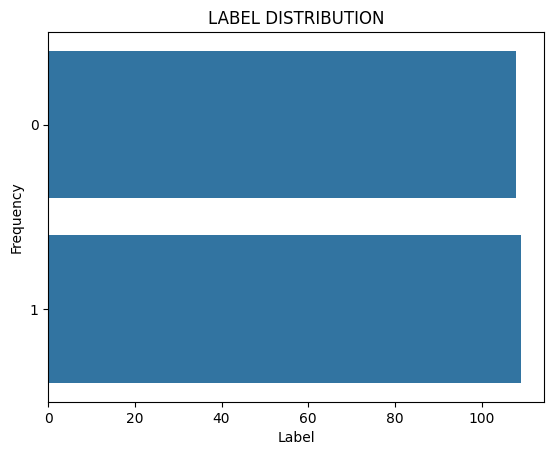

In [6]:
sns.countplot(data=df,y="Label")
plt.xlabel ("Label")
plt.ylabel ("Frequency")
plt.title ("LABEL DISTRIBUTION")

Text(0.5, 1.0, 'LABEL DISTRIBUTION')

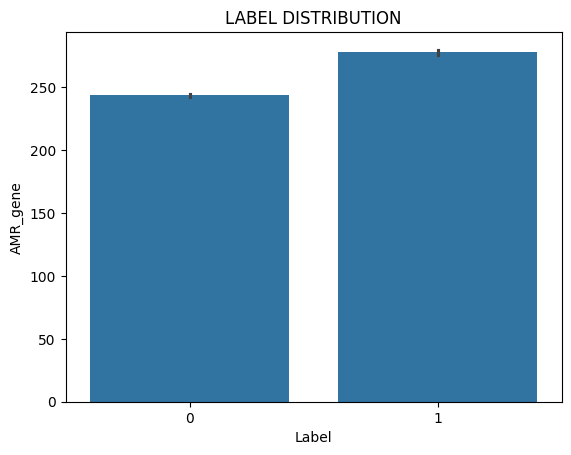

In [7]:
sns.barplot(data=df,x="Label",y="AMR_gene")
plt.xlabel ("Label")
plt.ylabel ("AMR_gene")
plt.title ("LABEL DISTRIBUTION")

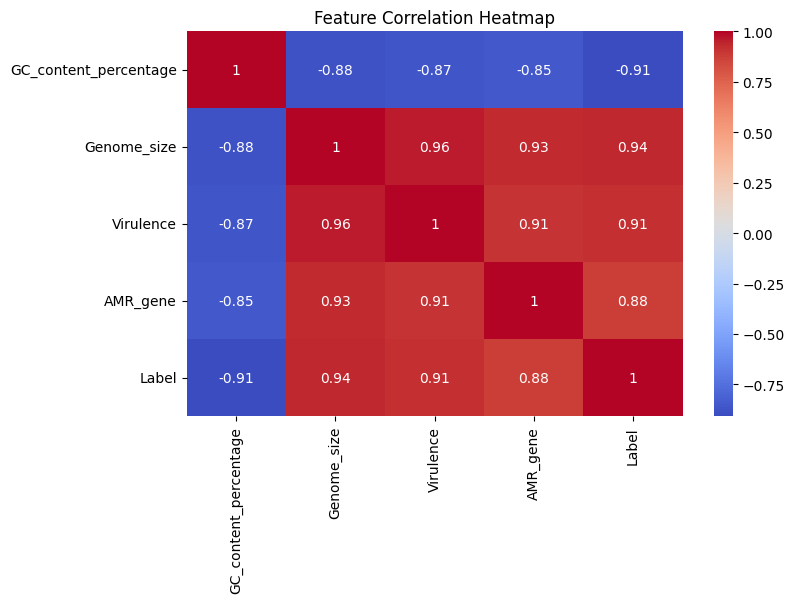

In [8]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

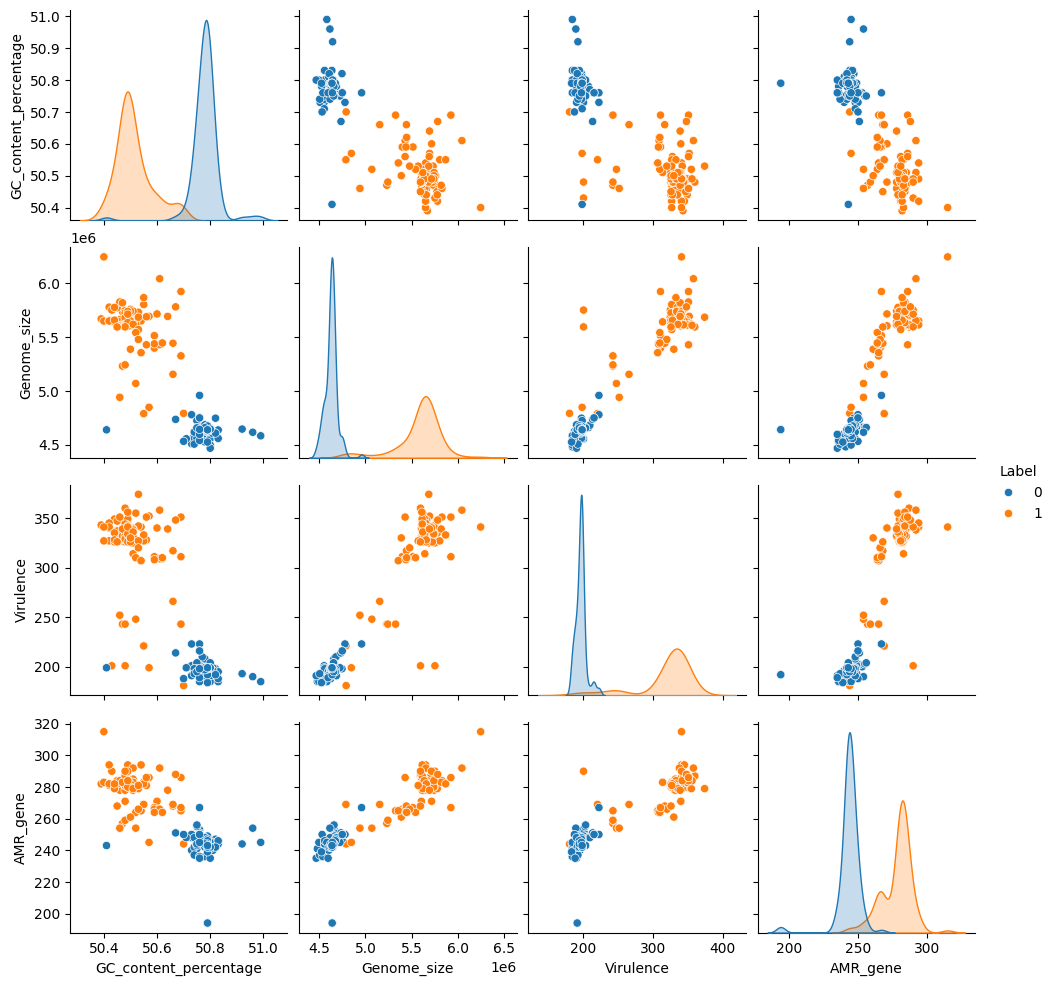

In [9]:
sns.pairplot(df, hue='Label',diag_kind='kde')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

In [11]:
X = df.drop('Label', axis=1)
y = df['Label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.2, random_state=42, stratify=y
)

In [13]:
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(X_train)
xtest_scaled = scaler.transform(X_test)

In [14]:
lr = LogisticRegression()
lr.fit(xtrain_scaled,y_train)
y_predict = lr.predict(xtest_scaled)

Base Model: Logistic Regression

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      0.95      0.98        22

    accuracy                           0.98        44
   macro avg       0.98      0.98      0.98        44
weighted avg       0.98      0.98      0.98        44



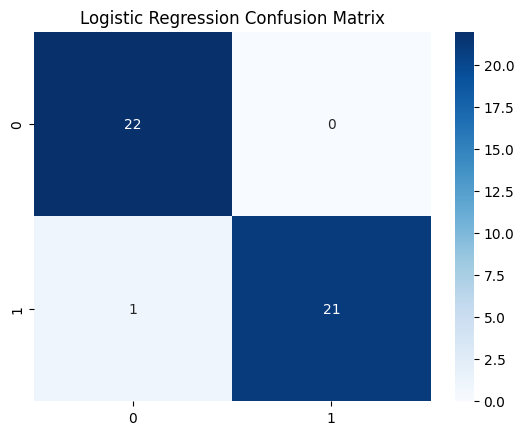

In [15]:
print("Base Model: Logistic Regression")
#print("Accuracy:" accuracy_score(y_test, y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test, y_predict),annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [16]:
coefficients = lr.coef_[0]

In [17]:
feature_names = df.drop('Label', axis=1).columns.tolist()

In [18]:
features = pd.Series(coefficients, index=feature_names)

In [19]:
sorted_imp = features.abs().sort_values(ascending=False)
sorted_features = features.loc[sorted_imp.index]

/tmp/ipython-input-579748877.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_features.values, y=sorted_features.index, palette='viridis')


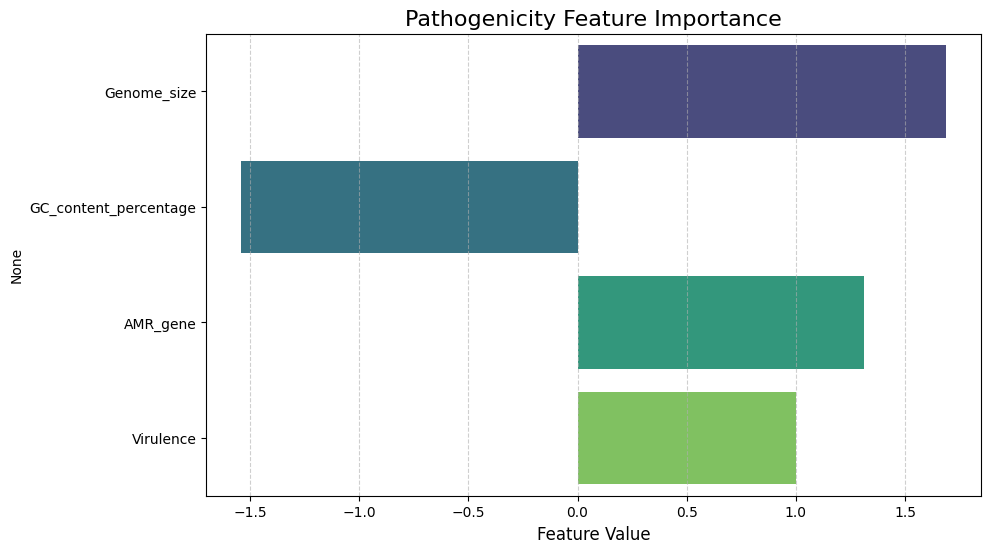

In [20]:
plt.figure(figsize=(10 , 6))
sns.barplot(x=sorted_features.values, y=sorted_features.index, palette='viridis')
plt.title('Pathogenicity Feature Importance', fontsize=16)
plt.xlabel('Feature Value', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

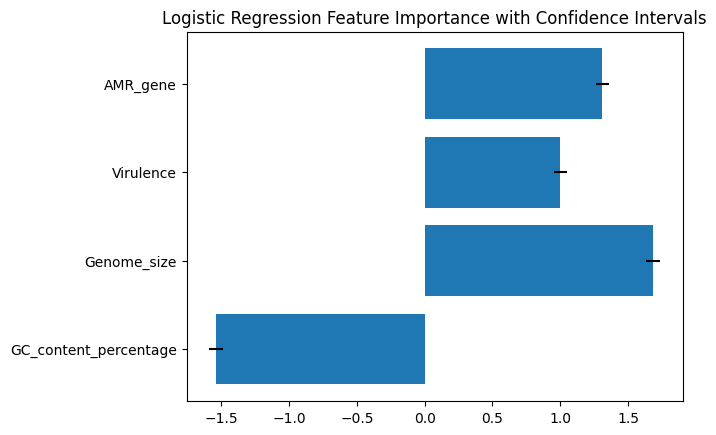

In [29]:
error_margin = 0.05 # Define a positive error margin

# Plot with error bars
plt.barh(feature_names, coefficients, xerr=error_margin)
plt.title('Logistic Regression Feature Importance with Confidence Intervals')
plt.show()

In [22]:
pip install SHAP

In [23]:
import shap

In [24]:
shap.initjs()

In [25]:
explainer = shap.LinearExplainer(lr,
xtrain_scaled
)

In [26]:
shap_values = explainer.shap_values(xtest_scaled)

---SHAP Summary Plot ---


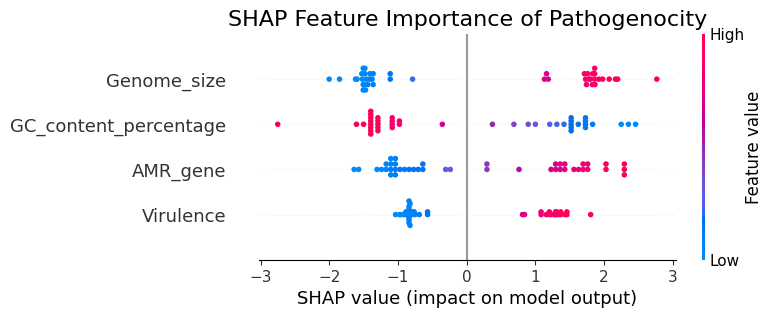

In [27]:
print("---SHAP Summary Plot ---")
plt.figure(figsize=(25 , 25))
shap.summary_plot(
shap_values,
xtest_scaled,
feature_names=feature_names,
plot_type="dot",
show=False
)
plt.title("SHAP Feature Importance of Pathogenocity", fontsize=16)
plt.show()

In [28]:
import joblib

# Save the model to a file
joblib.dump(lr, 'logistic_regression_model.pkl')
print("Model saved as 'logistic_regression_model.pkl'")

Model saved as 'logistic_regression_model.pkl'
